# <font color = 'red'> ЛР 10. Кластеризация </font>

Сложность: <font color = 'Red'> Сложно  </font>.

Дата составления: 25.11.2024

Срок выполнения: 2 недели (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Постановка задачи кластеризации </font>

Пусть задана обучающая выборка из некоторого множества объектов $X\in X_{all}$ $X = (\overline{x_1}, \overline{x_2},..., \overline{x_n}), \overline{x_i} \in \mathbb{R}^{m}$.

Задача **кластеризации** состоит в поиске обощённой функции или алгоритма $\alpha$ такой что: $\alpha:X_{all} \rightarrow Y$ или $\alpha(\overline x_{i}) = y_{i}$ для $\overline{x_i} \in X$. $Y$ - множество дискретных меток.

Алгоритмы кластеризации относят к классу *методов обучения без учителя* потому, что множество меток не известно заранее и формируется по ходу на основе обучающей выборки.

Множество $X_{cl}$ называют **кластером**, если $\forall \quad \overline{x} \in X_{cl}  \quad  \alpha(\overline{x}) = const = cl $.

## <font color = 'green'> 2. Обзор некоторых методов кластеризации  </font>

### Метод k-средних

Алгоритм **k-средних** - один из самых популярных и используемых методов кластеризации. Идея метода заключается в итеративном нахождении центров кластеров. 

Алгоритм требует изначального задания количества кластеров.

Кратко работу алгоритма можно описать так.

1. Задаём количество кластеров $k$.
2. Задаём случайные центры кластеров, которые назовём центроидами $C_{0} = (\overline{\mu_1}, \overline{\mu_2},..., \overline{\mu_k})$.
3. Кластеризуем данные из обучающей выборке, преисывая каждый сэмпл к ближ. кластеру (по некоторой метрике в $\mathbb{R}^{m}$). 
4. Далее сдвигаем положения центроидов в геометрический центр получившихся в п.3 кластеров. 
5. Проверяем условие выхода. Как правило суммарное расстояние между новыми и старыми центроидами ограничивают некторым малым значением $\epsilon$. В случае если условие выполнено, то возвращаем полученные центроиды кластеров. Если нет, возвращаемся к пункту 3.

Кластер для каждого объекта теперь определяется ближайшим к нему центроидом.

[Подробнее](https://en.wikipedia.org/wiki/K-means_clustering)

### DBSCAN

Алгоритм **DBSCAN** относится к плотностным алгоритмам кластеризации. Он предполагает специальный обход точек из обучающей выборки с последовательным их объединением в кластеры.

Общая идея работы алгоритма описывается следующим образом.

Точкой далее будем называть представителя пространства $\mathbb{R}^{m}$.
Также для работы алгоритма задают два важных гиперпараметра: точность $\epsilon$ и плотность $k$.

1. Точку $p$ будем называть **корневой** если в её $\epsilon$ - откретсности находится не менее $k$ точек.
2. Точка $q$ **прямо достижима** из $p$ если $p$-корневая точка, а расстояние $d(p,q)<\epsilon$. То есть точка $q$ в $\epsilon$ - откретсности $p$. Обозначим $p\rightarrow q$.
3. Точка $q$ **достижима** из $p$, если существует последовательность точек $p = p_{1}\rightarrow p_{2} \rightarrow p_{3}  \rightarrow ... \rightarrow p_{k} \rightarrow q $. Каждая точка $ p_{i}$ - корневая.

Кластер формирует любая корневая точка вместе со всеми точками (корневыми и нет) достижимыми из неё.

Для симметричности часто вводят понятие **плотностоной связности**. Две точки $p$ и $q$ называют *плотностно связанными*, если существует корневая точка $c$ такая что $p$ достижима из $c$ и $q$ достижима из $c$. Очивидно, что в данных терминах кластер - множество попарно *плотностно связаннымых* точек.

Реализация предполагает последовательный обход точек с формированием кластеров, согласно определениям выше. Точки, не попавшие не в один кластер (подумайте, откуда такие возьмутся?) кластризуются как шум. Алгоритм **DBSCAN** отлично показывает себя на обучающих данных различной формы.

[Подробнее](https://habr.com/ru/articles/322034/)

In [4]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import make_classification, make_blobs, make_moons, make_circles, make_swiss_roll
from matplotlib import pyplot as plt

In [6]:
import warnings
warnings.filterwarnings("ignore") 

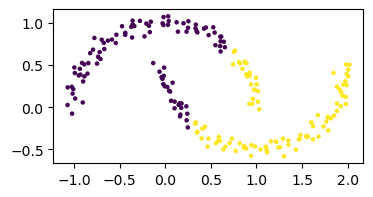

In [7]:
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.figure(figsize=(4, 2))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=5, cmap='viridis');

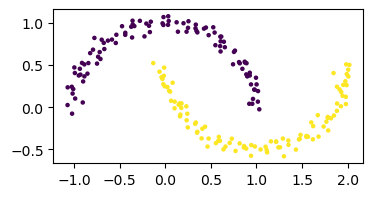

In [10]:
model = DBSCAN(eps=0.2,min_samples=5)
model.fit(X)
plt.figure(figsize=(4, 2))
plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
            s=5, cmap='viridis');

### Иерархическая агломеративная кластеризация.

Идея агломеративной кластеризации следующая.

1. Кластер формируется в каждой точке данных.
2. Далее кластеры попарно объединяются по принципу близости (к примеру минимальное расстояние между точками кластера).
3. Процесс продолжается пока данные не объединятся в один кластер.

Остановив процесс слияния на нужном этапе получим  кластеризацию на необходимое количество кластеров. 

[Подробнее](https://neerc.ifmo.ru/wiki/index.php?title=%D0%98%D0%B5%D1%80%D0%B0%D1%80%D1%85%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F)

## <font color = 'green'> 3. Задания </font>

<font color = 'red' size = 5>Задание 1 </font>

1. Реализуйте самостоятельно, описанные алгоритмы кластеризации.
2. Сравните результаты работы со встроенными методами. Графически интерпретируйте результаты.
3. Дайте аргументированные ответы о скорости и эффективности работы на различных искусственных данных для реализованных и встроенных алгоритмов.
4. Оцените качество кластеризации используя различные методы (ARI, силуэт и др). [Подробнее](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8)
5. Изучте ещё 3 любых метода кластеризации и приведите сравнительную характеристику работы 6 алгоритмов кластеризации по проивзодительности на различных данных.*
6. Реализовать анимацию работы алгоритма DBSCAN*

<font color = 'red' size = 5>Задание 2 </font>

1. Примените изученные методы кластеризации для указанных ниже данных.
2. Приведите различные оценки качества для моделей.
3. Предложите методики для определения оптимальных гиперпараметров моделей.
4. Дайте аргументированные ответы о применимости того или иного алгоритма на различных данных.

[Датасет 1](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering)

[Датасет 2](https://www.kaggle.com/datasets/dev0914sharma/customer-clustering/code)

[Датасет 3](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

<font color = 'red' size = 5>Задание 3 </font>

1. Кластеризуйте данные о [старанах](https://www.kaggle.com/datasets/fernandol/countries-of-the-world) различными методами, и отобразите их на интерактивной [карте](https://plotly.com/python/choropleth-maps/).




<font color = 'red' size = 5>Задание 4 </font>

1. Используя кластеризацию проведите сжатие вашего последнего фото в Instagram.


